Este código fue editado por Laura Natalia Martínez Ramírez, Natalia Lucía Oliveros Gómez y Paula Andrea Cardenas Ayala (grupo 6), a partir el código 'S4_Energia_celda_2D_Electron_Libre' con el fin de ser implementado en 3 dimensiones.

## Estructura de bandas electrónicas para una red 3D FC en la aproximación de electrón libre

## Vectores red recíproca y puntos estrella

Se definen los vectores de la primera zona de Brillouin 3D para una celda FCC con lo cual se puede recuperar toda la información del cristal. Además se definen los puntos estrella para esta configuración.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = 1  #Se define la constante de red

pi = np.pi
b  = 2*pi/a 

#Se definen los vectores de la red recíproca
b1 = np.r_[b, b, -b]
b2 = np.r_[b, -b, b]
b3 = np.r_[-b, b, b]

#Se definen los puntos estrellas
k_Gamma = np.r_[0, 0, 0]
k_K = np.r_[3*b/4, 3*b/4, 0]
k_X = np.r_[b, 0, 0 ] 
k_Z = np.r_[b/2, b/4]
k_L = np.r_[b/2, b/2, b/2]
k_W = np.r_[b, b/2, 0]    
k_U = np.r_[b, b/4, b/4]   

In [58]:
from scipy import constants as cte

hbar = cte.hbar/cte.e # eV s
m_e  = cte.m_e
z = 8

#Se define la energía
e_f = (z*(hbar*b)**2)/(2*m_e*2*pi)


def energy(k1, k2, m1 = 0, m2 = 0, m3= 0,  number_of_k_points = 1000):
    k_12 = k2 - k1
    norm_k_12 = np.linalg.norm(k_12)
    uk_12 = k_12 / norm_k_12
    X = np.linspace(0, norm_k_12, number_of_k_points)
    K = [ k1 + x*uk_12 + m1*b1 + m2*b2 + m3*b3 for x in X ]
    E = [ hbar**2 * np.dot(k,k) / (2*m_e) for k in K]
    return X, np.array(E)


Text(0,0.5,'$E_{\\vec{k}}$ [eV]')

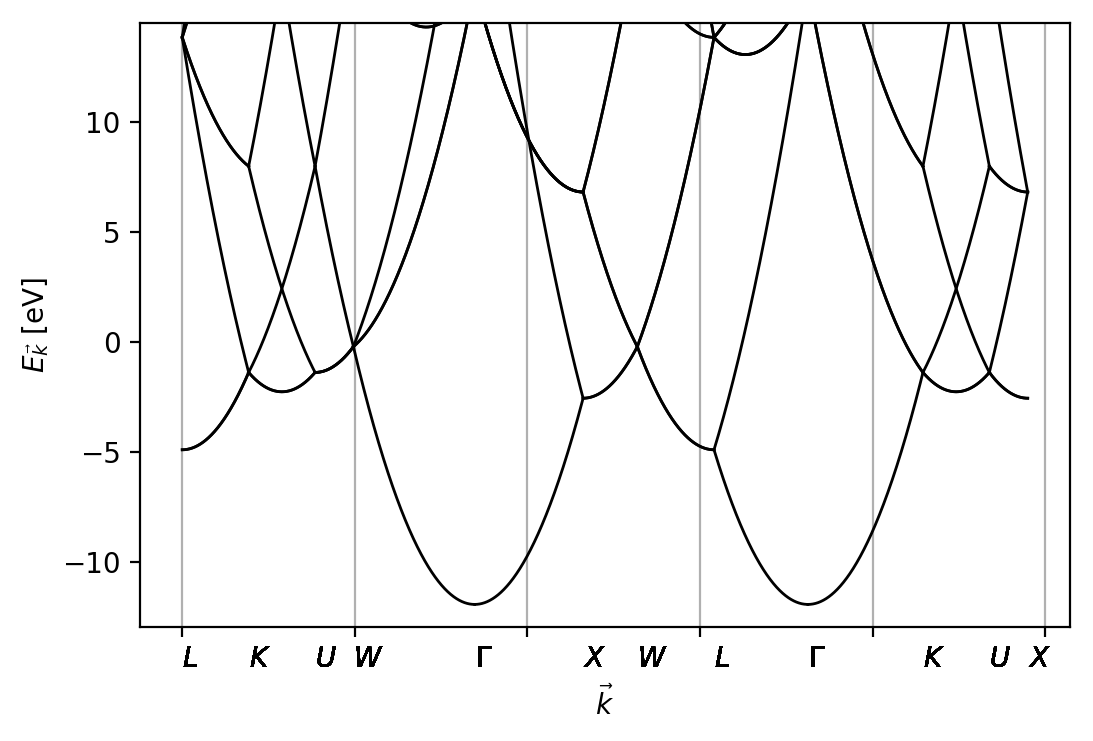

In [61]:
# Se define la trayectoria por los puntos estrellas
k_path = [k_L, k_K, k_U, k_W, k_Gamma, k_X, k_W, k_L, k_Gamma, k_K, k_U, k_X]
k_labels = [r'$L$', r'$K$', r'$U$', r'$W$',r'$\Gamma$', r'$X$', r'$W$', r'$L$', r'$\Gamma$', r'$K$', r'$U$', r'$X$']

plt.figure(dpi = 200)
#Se definen los 26 vecinos
BZ = { # valores de m1 y m2 para la BZ -> (m1, m2)
    1: ( 0,  0, 0),
    2: (-1,  0, 0),
    3: ( 0, -1, 0),
    4: ( 0,  0, -1),
    5: (-1, -1, -1),
    6: ( 1,  0, 0),
    7: ( 0,  1, 0),
    8: ( 0,  0, 1),
    9: (1,  1, 1),
    10: ( 1, 1, -1),
    11: ( 1, -1, 1),
    12: ( -1, 1, 1),
    13: (1,  1, 0),
    14: ( 1, 0, 1),
    15: ( 0, 1, 1),
    16: ( -1, -1, 1),
    17: ( -1, 1, -1),
    18: ( 1, -1, -1),
    19: (-1,  -1, 0),
    20: ( -1, 0, -1),
    21: ( 0, -1, -1),
    22: ( 1, -1, 0),
    23: ( 1, 0, -1),
    24: ( -1, 1, 0),
    25: ( -1, 0, 1),
    26: ( 0, -1, 1),
    27: ( 0, 1, -1),}

z_index = []
for zone in range(1, 28):
    m1 = BZ[zone][0]
    m2 = BZ[zone][1]
    m3 = BZ[zone][2]
    Dk = 0
    #Se grafican las energías de cada punto a lo largo de la trayectoria
    for i in range(len(k_path)-1):
        k, E = energy(k_path[i], k_path[i+1], m1 = m1, m2 = m2, m3=m3)
        k += Dk
        plt.plot(k, E-e_f, 'k', lw = 1)  #A cada valor de la energía se le resta la energía de fermi para z=8
        Dk = k.max()
        if i < len(k_labels):
            plt.text(k.min(), -14.8, k_labels[i])
            plt.text(k.max(), -14.8, k_labels[i+1])

# Para obtener la misma gráfica del libro debe mostrarse solo un rango de energía
plt.ylim(-13,14.5)  
#Se muestran líneas verticales
plt.grid(True, axis ='x', linestyle='-')
#Se pone de color blanco las etiquetas de los valores de k en el eje x para no mostrarlo
plt.xticks(color = 'w')
plt.xlabel(r'$\vec{k}$')
plt.ylabel(r'$E_{\vec{k}}$ [eV]')

## Grafica original obtenida con el código original

Text(0,0.5,'$E_{\\vec{k}}$ [eV]')

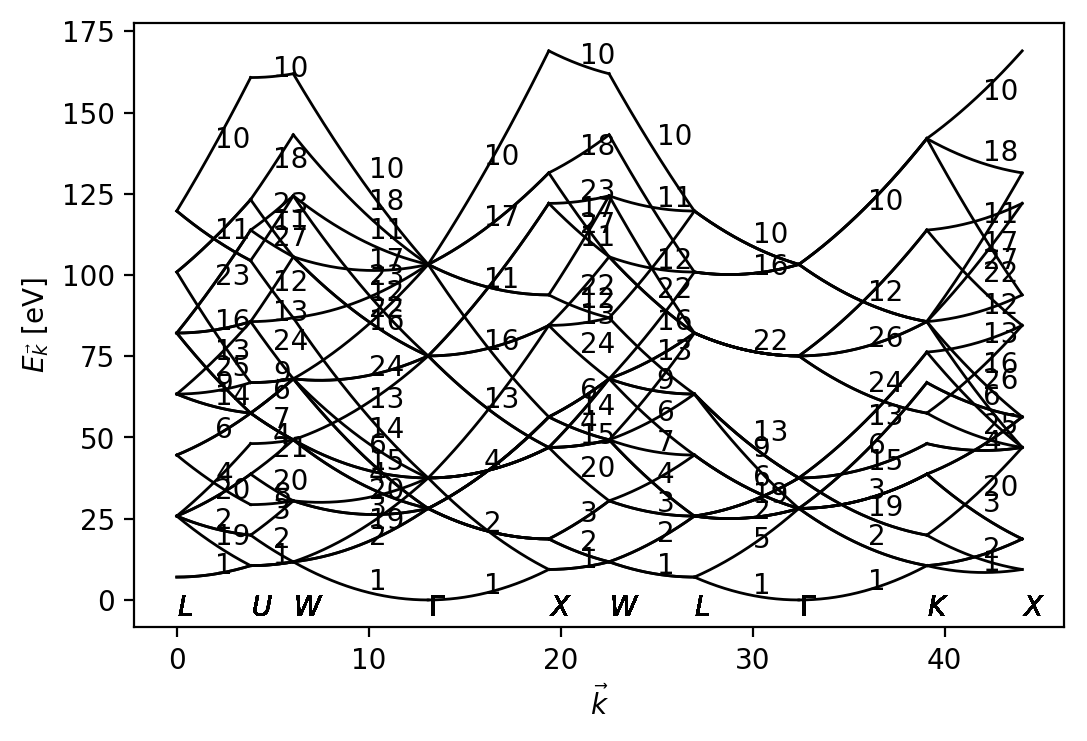

In [64]:
k_path = [k_L,  k_U, k_W, k_Gamma, k_X, k_W, k_L, k_Gamma, k_K, k_X]
k_labels = [r'$L$', r'$U$', r'$W$',r'$\Gamma$', r'$X$', r'$W$', r'$L$', r'$\Gamma$', r'$K$',r'$X$']

plt.figure(dpi = 200)
BZ = { # valores de m1 y m2 para la BZ -> (m1, m2)
    1: ( 0,  0, 0),
    2: (-1,  0, 0),
    3: ( 0, -1, 0),
    4: ( 0,  0, -1),
    5: (-1, -1, -1),
    6: ( 1,  0, 0),
    7: ( 0,  1, 0),
    8: ( 0,  0, 1),
    9: (1,  1, 1),
    10: ( 1, 1, -1),
    11: ( 1, -1, 1),
    12: ( -1, 1, 1),
    13: (1,  1, 0),
    14: ( 1, 0, 1),
    15: ( 0, 1, 1),
    16: ( -1, -1, 1),
    17: ( -1, 1, -1),
    18: ( 1, -1, -1),
    19: (-1,  -1, 0),
    20: ( -1, 0, -1),
    21: ( 0, -1, -1),
    22: ( 1, -1, 0),
    23: ( 1, 0, -1),
    24: ( -1, 1, 0),
    25: ( -1, 0, 1),
    26: ( 0, -1, 1),
    27: ( 0, 1, -1),}

z_index = []
for zone in range(1, 28):
    m1 = BZ[zone][0]
    m2 = BZ[zone][1]
    m3 = BZ[zone][2]
    Dk = 0
    for i in range(len(k_path)-1):
        k, E = energy(k_path[i], k_path[i+1], m1 = m1, m2 = m2, m3=m3)
        k += Dk
        plt.plot(k, E, 'k', lw = 1)
        Dk = k.max()
        if i < len(k_labels):
            plt.text(k.min(), -4.8, k_labels[i])
            plt.text(k.max(), -4.8, k_labels[i+1])
        zi = (np.round(k.mean()), np.round(E[np.int16(E.size/2)]))
        if not zi in z_index:
            z_index.append(zi)
            plt.text(zi[0], zi[1], zone)


plt.xlabel(r'$\vec{k}$')
plt.ylabel(r'$E_{\vec{k}}$ [eV]')